# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units=metric&q={city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | sitka
Processing Record 3 of Set 1 | tuy hoa
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | port augusta
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | shenjiamen
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | kantilo
Processing Record 12 of Set 1 | touros
Processing Record 13 of Set 1 | camacupa
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | naze
Processing Record 16 of Set 1 | flying fish cove
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | bontang
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | iqaluit
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
print(city_data_df)



                  City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0    port-aux-francais -49.3500   70.2167      1.68        77         100   
1                sitka  57.0531 -135.3300     15.94        77         100   
2              tuy hoa  13.0833  109.3000     29.85        65          97   
3         kruisfontein -34.0033   24.7314      7.71        91          41   
4             qaqortoq  60.7167  -46.0333      4.80        91          92   
..                 ...      ...       ...       ...       ...         ...   
572       agat village  13.3886  144.6585     31.52        78          40   
573           aripuana  -9.1667  -60.6333     23.61        43           2   
574            farkhar  36.5729   69.8578     22.99        34          67   
575              vogan   6.3333    1.5333     23.69        90         100   
576       port douglas -16.4833  145.4667     20.85        58          56   

     Wind Speed Country        Date  
0          6.19      TF  1721525749  

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,1.68,77,100,6.19,TF,1721525749
1,sitka,57.0531,-135.3300,15.94,77,100,2.57,US,1721525750
2,tuy hoa,13.0833,109.3000,29.85,65,97,8.88,VN,1721525751
3,kruisfontein,-34.0033,24.7314,7.71,91,41,3.52,ZA,1721525752
4,qaqortoq,60.7167,-46.0333,4.80,91,92,1.54,GL,1721525754


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.68,77,100,6.19,TF,1721525749
1,sitka,57.0531,-135.3300,15.94,77,100,2.57,US,1721525750
2,tuy hoa,13.0833,109.3000,29.85,65,97,8.88,VN,1721525751
3,kruisfontein,-34.0033,24.7314,7.71,91,41,3.52,ZA,1721525752
4,qaqortoq,60.7167,-46.0333,4.80,91,92,1.54,GL,1721525754


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

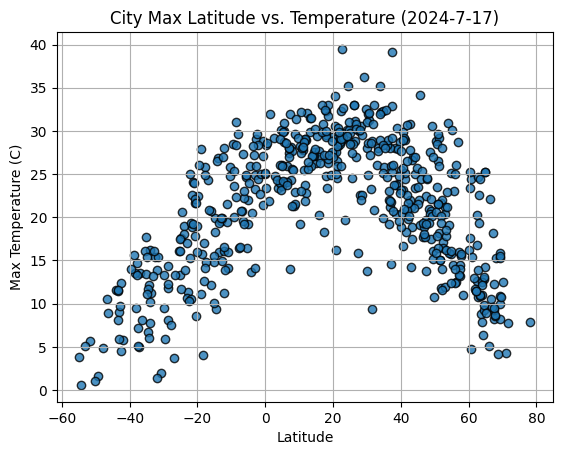

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor = "black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-7-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

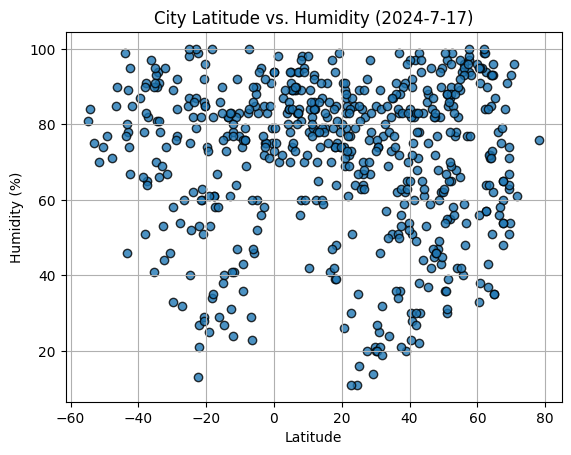

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors = "black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-7-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

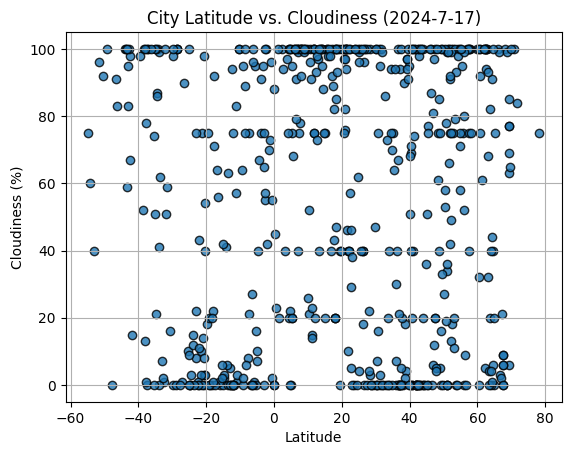

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors = "black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-7-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

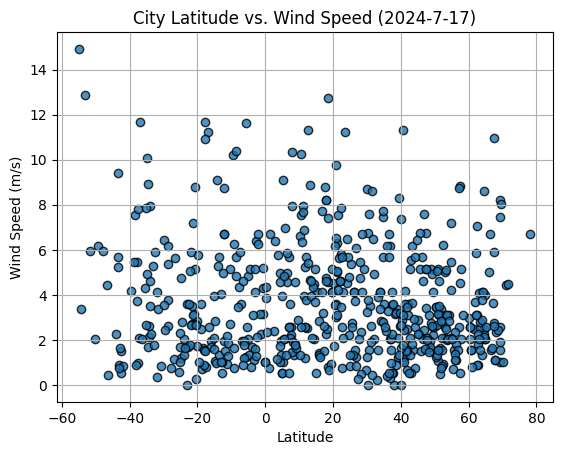

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors = "black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-7-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * np.array(slope) + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    # Print r-squared value
    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(text_coordinates[0], text_coordinates[1], equation_text, fontsize = 12, color = "red")
   
    print(f"The r-squared is: {rvalue}")
    plt.show()


In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sitka,57.0531,-135.3300,15.94,77,100,2.57,US,1721525750
2,tuy hoa,13.0833,109.3000,29.85,65,97,8.88,VN,1721525751
4,qaqortoq,60.7167,-46.0333,4.80,91,92,1.54,GL,1721525754
7,shenjiamen,29.9576,122.2980,27.99,85,100,8.68,CN,1721525757
9,hamilton,39.1834,-84.5333,23.84,65,97,2.08,US,1721525759


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.68,77,100,6.19,TF,1721525749
3,kruisfontein,-34.0033,24.7314,7.71,91,41,3.52,ZA,1721525752
5,port augusta,-32.5000,137.7667,15.41,44,1,5.91,AU,1721525755
6,waitangi,-43.9535,-176.5597,11.57,99,100,2.24,NZ,1721525756
8,blackmans bay,-43.0167,147.3167,9.07,78,95,0.89,AU,1721525758


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.6554256158195709


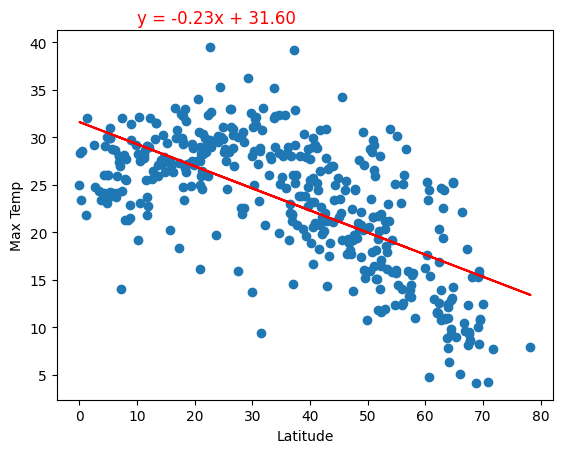

In [34]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", (10, 42))

The r-squared is: 0.7553430156204554


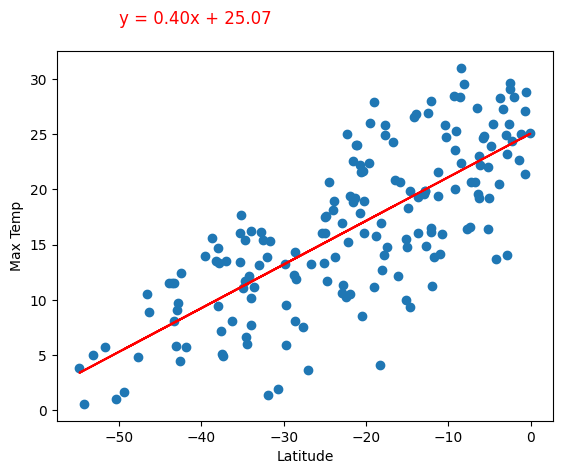

In [37]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", (-50, 35))


**Discussion about the linear relationship:** 
Northern Hemisphere:
The slope of −0.21 shows a negative linear relationship between latitude and the dependent variable. As latitude increases, the dependent variable decreases. The points arescattered around the regression line, indicating a moderate linear relationship. There is visible variability, but the downward trend is clear.

Southern Hemisphere: 
The slope of 0.44 shows a positive linear relationship between latitude and the dependent variable. As latitude increases, the dependent variable also increases. The points are more tightly clustered around the regression line compared to the first chart, indicating a stronger linear relationship. There is less variability around the line.


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.11035529742642891


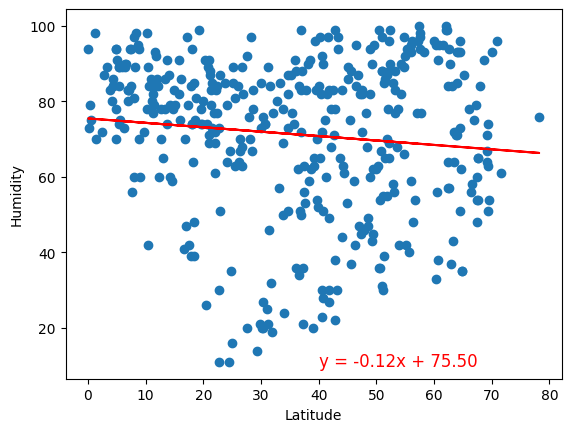

In [38]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", (40, 10))

The r-squared is: -0.11520422795708431


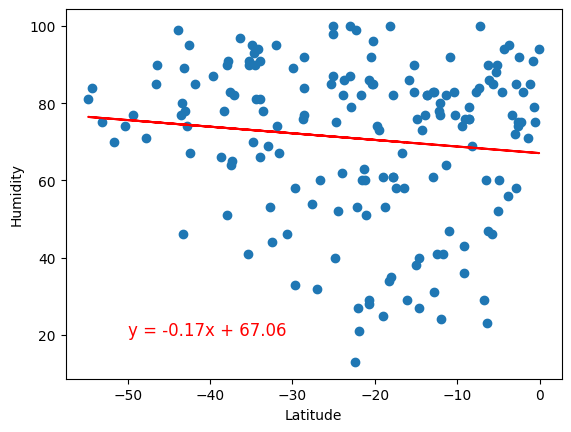

In [39]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", (-50, 20))

**Discussion about the linear relationship:** 
The two scatter plots depict the relationship between Latitude and Humidity, each with a fitted linear regression line. In the Northern Hemisphere plot, the regression equation indicates a very weak positive linear relationship, suggesting that as Latitude increases, the variable increases slightly. The second plot, shows a weak negative linear relationship, where the variable decreases slightly as Latitude increases. Overall, both plots suggest that Latitude has a minimal influence on Humidity, with very weak trends in both positive and negative directions.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.1495234732553629


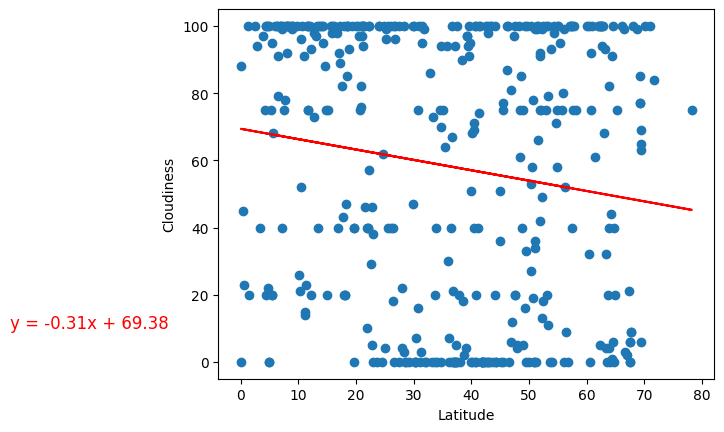

In [40]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", (-40, 10))

The r-squared is: -0.23334649872329924


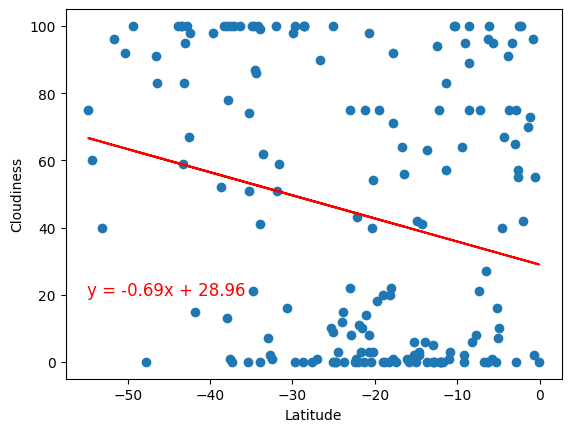

In [41]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", (-55, 20))

**Discussion about the linear relationship:** The relationship between Latitude and Cloudiness is shown through the linear regression line in both the Northern and Southern Hemispheres. In the Northern Hemisphere, the regression equation indicates a weak negative linear relationship, suggesting that as Latitude increases, Cloudiness slightly decreases. In the Southern Hemisphere, the regression equation y=−0.69x+28.shows a negative linear relationship, but with a steeper slope, indicating decrease in Cloudiness with increasing Latitude. Overall, both hemispheres exhibit a negative correlation between Latitude and Cloudiness, with the effect being more substantial in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.13832758679294835


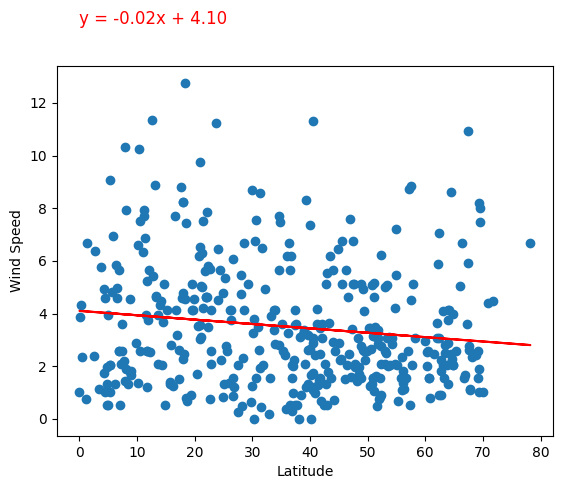

In [45]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", (0, 15))

The r-squared is: 0.009638206713060354


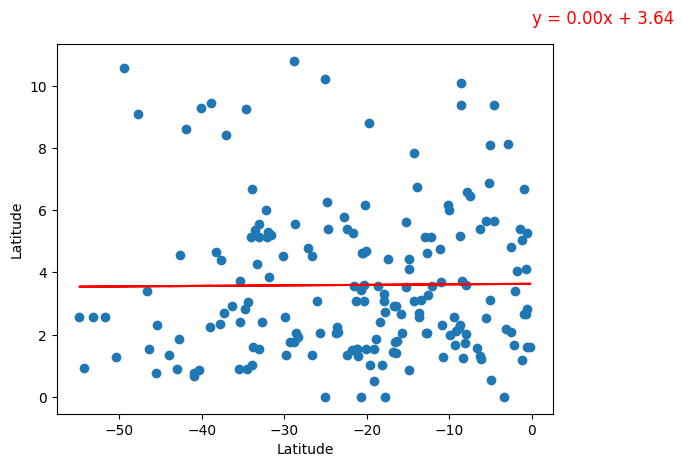

In [48]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", "Latitude", (0, 12))

**Discussion about the linear relationship:** The linear regression analysis between Latitude and Wind Speed shows distinct patterns in the Northern and Southern Hemispheres. In the Northern Hemisphere, the regression equation shows a very weak negative linear relationship, indicating that Wind Speed slightly decreases as Latitude increases. While in the Southern Hemisphere, the regression equation suggests no linear relationship between Latitude and Wind Speed, as the slope is zero. Overall, while there is a minimal decrease in Wind Speed with increasing Latitude in the Northern Hemisphere, the Southern Hemisphere shows no significant correlation between these variables.